<a href="https://colab.research.google.com/github/tanay47/Airbnb-Data-Analysis/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

***Airbnb is an online space where person rent their unused rooms or entire house. Irrespective owning any of the property, Airbnb acts as a broker, receiving margin from each booking. Since 2008 Airbnb is growing at fast paced, and now it has over 7 million accommodations in more than 191 countries and regions globally.***

***Now we are going to experiment and understand relationship between different factors in New York City.***


In [1]:
# Importing useful libraries in python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Mounting drive below
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Loading Airbnb NYC dataset
file_path = '/content/drive/MyDrive/Colab Notebooks/Module 1/CS PROJECT 1 (EDA)/Copy of Airbnb NYC 2019.csv'
dataset = pd.read_csv(file_path)

In [4]:
# Checking shape of dataset.

dataset.shape

(48895, 16)

In [5]:
# Checking basic info about dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
# Viewing head of the dataset
dataset.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [7]:
# Lets create copy of current dataset and now we will work on copied data
airbnb = dataset.copy()

In [8]:
# Finding null values in dataset
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

**By Checking above, got to know that we have max no. of nulls in last_review and reviews_per_month.**

**After seeing initial data, last_review column is something related to datetype and have more nulls , so I think we can drop this column for further analysis.**

In [9]:
# Dropped last_review column
airbnb.drop('last_review', axis=1, inplace=True)

For rest null values in dataset, we are replacing it by 0 for now.

In [10]:
# Replacing null values by 0 in name, host_name, reviews_per_month
airbnb[['name','host_name','reviews_per_month']].fillna(value=0, inplace=True)


In [11]:
# Checking if still any value present in dataset
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

**Now, we can clearly that there are no null values in dataset.**

**To have a sensible data to work with, we will check and eliminate duplicate observations/records.**

In [12]:
# Check and eliminate duplicate observations/records.

dupli_rows_df = airbnb[airbnb.duplicated()]
print(f"Number of duplicate record is", {dupli_rows_df.shape}) 

Number of duplicate record is {(0, 15)}


**Great, we have no duplicate observations/records. Moving ahead.**

In [13]:
# Checking unique values over each columns
airbnb.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

**ALRIGHT, WE NOW HAVE A BASIC IDEA OF OUR DATASET AND ALSO WE ARE DONE WITH CLEANING OUR DATA. NOW OUR DATASET IS READY FOR ANALYSIS WITH BETTER ACCURACY THAN BEFORE.**

### 1. LET'S START OUR ANALYSIS WITH "10 MOST POPULAR NIEGHBOURHOOD".

In [16]:
### GROUPING ON "neighbourhood" COLUMN AND COUNTING THE OCCURANCE IN DATASET.

neighbourhood_count_df = pd.DataFrame(airbnb.groupby("neighbourhood")["neighbourhood"].count().sort_values(ascending=False)[:10])
neighbourhood_count_df.rename(columns={"neighbourhood":"Count"}, inplace=True)
neighbourhood_count_df.reset_index(inplace=True)

print(f"Most demanding/popular neighbourhood are \n\n {neighbourhood_count_df}")

Most demanding/popular neighbourhood are 

         neighbourhood  Count
0        Williamsburg   3920
1  Bedford-Stuyvesant   3714
2              Harlem   2658
3            Bushwick   2465
4     Upper West Side   1971
5      Hell's Kitchen   1958
6        East Village   1853
7     Upper East Side   1798
8       Crown Heights   1564
9             Midtown   1545


So, we can see that "***Williamsburg***" , "***Bedford-stuyvesant***", "***Harlem***" are most in demand neighbourhoods. 

Let's take a step ahed and plot it graphically on a bar graph to have a visual over difference in popularity.

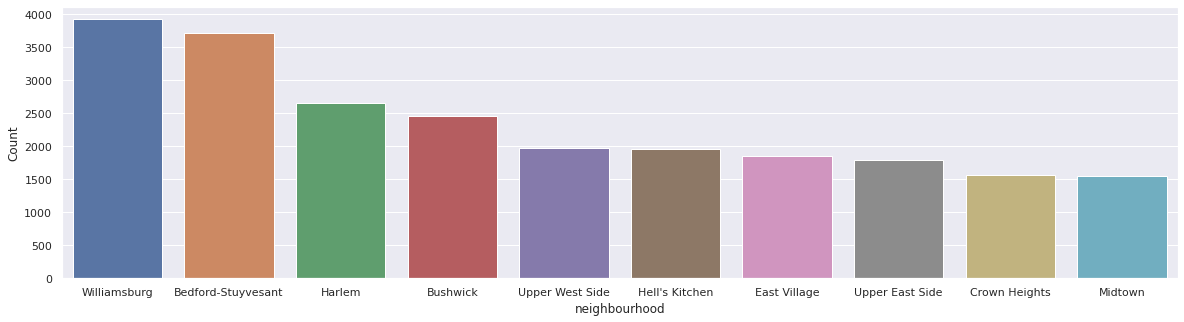

In [17]:
### PLOTTING THE ABOVE QUERY GRAPHICALLY USING "matplotlib".

sns.set(rc={'figure.figsize':(20,5)})
x,y = neighbourhood_count_df["neighbourhood"],neighbourhood_count_df["Count"]
sns.barplot(x,y)



Lokking at the plot above, we can clearly conclude that "***Williamsburg***" and "***Bedford-stuyvesant***" are almost equally popular lying within the count range of ***3500*** and ***4000***

Also we can observe a considerable count/popularity ***drop*** from "***Bedford-stuyvesant***" to "***Harlem***"

### 2. LET'S CHECK AVERAGE PRICE FOR THESE POPULLAR NEIGHBOURHOOD.

In [19]:
### CALCULATING AVERAGE PRICE OF TOP 10 NEIGHBOOURS. (REFFERING ABOVE DATASET)

# CREATING EMPTY LIST TO STORE VALUES IN.
top_neighbourhood_list = list(neighbourhood_count_df["neighbourhood"])
avg_neigh_list = []

# HERE WE WILL SUBSET OUR MAIN DATAFRAME(airbnb_df) TO CALCULATE MEAN FOR EACH NEIGHBOURHOOD.
for ele in top_neighbourhood_list:
  subset = airbnb[airbnb["neighbourhood"]== ele]
  mean = subset["price"].mean()
  avg_neigh_list.append(mean)

In [20]:
### NOW THAT WE HAVE A LIST, ADD IT TO TOP "neighbourhood_count_df".

neighbourhood_count_df["avg_price"] = avg_neigh_list
neighbourhood_count_df

,neighbourhood,Count,avg_price
0,Williamsburg,3920,143.802806
1,Bedford-Stuyvesant,3714,107.678244
2,Harlem,2658,118.974041
3,Bushwick,2465,84.800406
4,Upper West Side,1971,210.918316
5,Hell's Kitchen,1958,204.794178
6,East Village,1853,186.083108
7,Upper East Side,1798,188.948276
8,Crown Heights,1564,112.480179
9,Midtown,1545,282.719094


plotting a bar graph for visual representation.


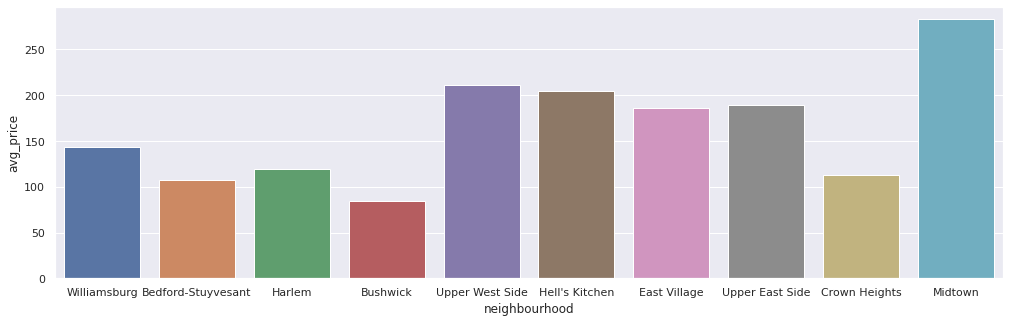

In [21]:
### SIMPLE BAR PLOT OF "nieghbourhood" VS "avg_price".

sns.set(rc={'figure.figsize':(17,5)})
x,y = neighbourhood_count_df["neighbourhood"],neighbourhood_count_df["avg_price"]
sns.barplot(x,y)

Having a really ***low*** average price for neighbourhood like "***Williamsburg***" , "***Bedford-stuyvesant***", "***Harlem***" tells us why these are the most popular neighbourhood.

### 3. Analysis of aggregate price of different room type for each neighbourhood groups.

In [33]:
# AGGREGATE PRICE OF "room_type" OVER EACH "neighbourhood_group".

agg_price_neigh_group = pd.DataFrame(airbnb.groupby(['neighbourhood_group','room_type'])['price'].agg(np.mean).unstack())
agg_price_neigh_group

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.506596,66.788344,59.800000
Brooklyn,178.327545,76.500099,50.527845
Manhattan,249.239109,116.776622,88.977083
Queens,147.050573,71.762456,69.020202
Staten Island,173.846591,62.292553,57.444444


**Let's make the above dataframe a little easier to analyse.**

Text(0.5, 1.0, 'AGGREGATE PRICE OF "room_type" OVER EACH "neighbourhood_group"')

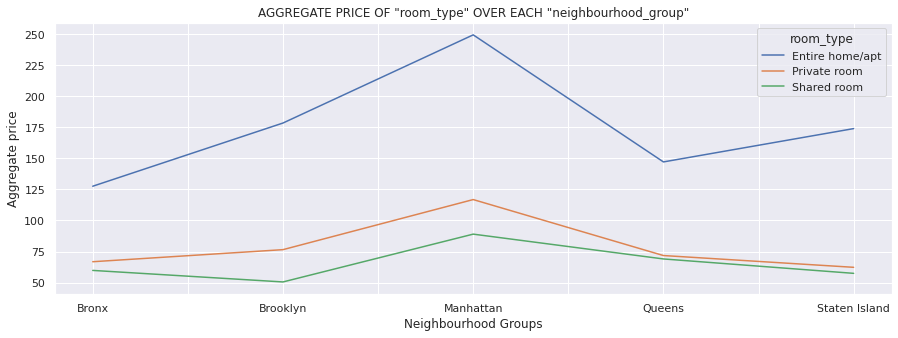

In [35]:
# Plotting line graph
agg_price_neigh_group.plot(kind="line", figsize=(15,5))

plt.ylabel('Aggregate price')
plt.xlabel('Neighbourhood Groups')
plt.title('AGGREGATE PRICE OF "room_type" OVER EACH "neighbourhood_group"')

By seeing above, it clearly visible that **Manahttan** is neighbourhood group which have ***highest* aggregate price** in all room types(**entire home/private room/shared room**).

But if we talk about lowest aggregate price over different room types, then we notice in case of **Entire room/apt *lowest* aggregate price** is in **Bronx**, in case of **private room Staten Island** and in case of **shared room Brookyln** is having ***lowest* aggregate price**.

### 4.  let's find out, which room type was more prefered and which was least prefered.

In [22]:
### DIFFERENT TYPES OF "room_types"

airbnb["room_type"].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [24]:
### GROUPING AND COUNTING.

room_types_df = pd.DataFrame(airbnb.groupby("room_type")["room_type"].count())
room_types_df.rename(columns={"room_type":"Count"}, inplace=True)
#room_types_df.reset_index(inplace=True)

room_types_df

,Count
room_type,
Entire home/apt,25409
Private room,22326
Shared room,1160


Alright, we can clearly see that "**Apartment**" were the most in demand room type. Followed by "**Private room**" and "**Shared room**"

Why not plot a pie chart with percentage distribution. 

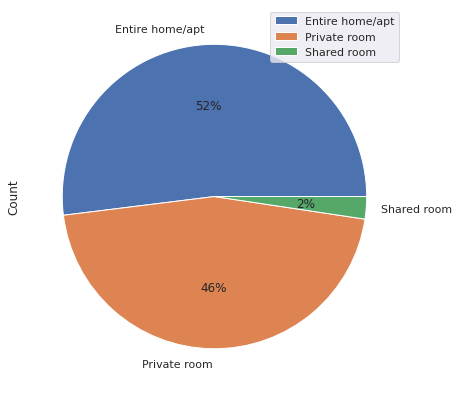

In [25]:
### PLOTTING PIE CHART USING MATPLOTLIB.

room_types_df.plot.pie(y='Count', figsize=(7, 7), autopct='%.0f%%')

### 5. Let's Analyse count distribution of different room type for different neighbourhood groups.

In [28]:
# COUNT DISTRIBUTION OF DIFFERENT ROOM TYPES FOR DIFFERENT NEIGHBOURHOOD GROP.

room_neigh_freq = pd.DataFrame(airbnb.groupby('neighbourhood_group')['room_type'].value_counts().unstack())
room_neigh_freq

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,379,652,60
Brooklyn,9559,10132,413
Manhattan,13199,7982,480
Queens,2096,3372,198
Staten Island,176,188,9


Making it a little bit easier to draw insights using a Bar Graph.

Text(0.5, 1.0, 'COUNT DISTRIBUTION OF DIFFERENT ROOM TYPES FOR DIFFERENT NEIGHBOURHOOD GROP')

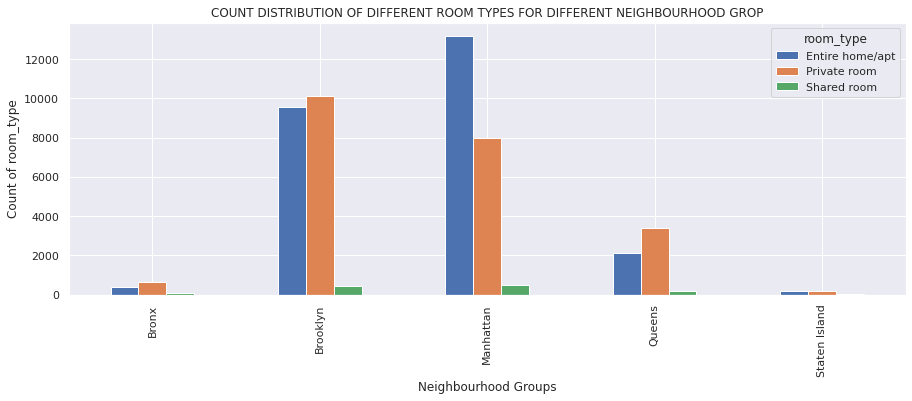

In [30]:
# SIMPLE BAR GRAPH FOR ABOVE DATAFRAME

room_neigh_freq.plot(kind="bar", figsize=(15,5))
plt.ylabel('Count of room_type')
plt.xlabel('Neighbourhood Groups')
plt.title('COUNT DISTRIBUTION OF DIFFERENT ROOM TYPES FOR DIFFERENT NEIGHBOURHOOD GROP')

From above graph, we clearly see that **Manhattan** has maximun number of airbnbs.

also, in every Neighbourhood group we can observe that "***Entire Home/apt***" and "***Private Rooms***" are way greater in count compared to "***Shared Rooms***"

### 6. LET'S NOW ANALYSE RELATION BETWEEN "**minimum_nights**" And "**number_of_reviews**". ALSO LET'S CHECK WHICH ROOMS WITH MINIMUM NO OF NIGHTS WERE PREFERED AND REVIEWED.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


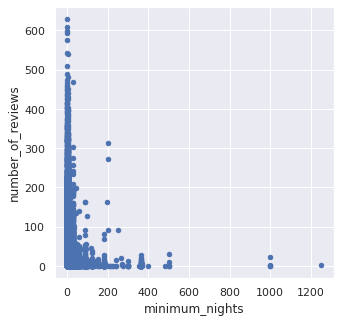

In [37]:
### USING SCATTER PLOT TO VISUALLY SEE THE RELATION.

room_price_df = pd.concat([airbnb["minimum_nights"], airbnb["number_of_reviews"]], axis=1)
room_price_df.plot.scatter(x="minimum_nights", y="number_of_reviews", figsize=(5,5))

LOOKING AT THE FIGURE ABOVE, WE CAN CONCLUDE CUSTOMERS MOSTLY STAYED AT ROOMS WHICH HAD "***MINIMUM STAY OF 1 NIGHT***", ALSO REVIEWED THESE ROOMS A LOT MORE.